In [2]:
import pandas as pd

data = pd.read_csv('telecom_Customer.csv')
data.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


From the above dataset, it's easy understandable that the dependent ot the target variable is the customer category, i.e., custcat.

The custcat is a categorical data. Let's do the analysis for this variable.

In [3]:
data['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [0]:
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
%matplotlib inline

In [5]:
data.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [29]:
#printing the data columns
data.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

<function matplotlib.pyplot.show>

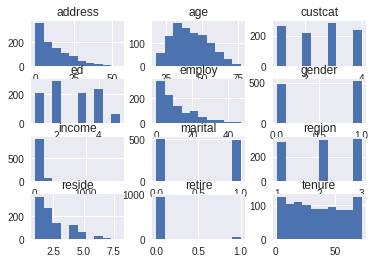

In [30]:
#using this to visualize the variables

var = data[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed','employ', 'retire', 'gender', 'reside', 'custcat']]
var.hist()
plt.show

Dividing the dataset into training and testing, then getting it ready for the model.
Also, data standarization is performed to get meaning comparisons, i.e., shifting the distribution of each attribute to have a mean of zero and a standard deviation of one unit variance.

In [57]:
X = data[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed','employ', 'retire', 'gender', 'reside']]
Y = data[['custcat']]

#converting it to numpy d-array and standarizing it
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
#Y = np.asarray(data['custcat']).reshape(-1,1)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


Performing out-of-sample data methods, so that model can give good accuracy on unknown data.

In [59]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( X, Y.values.ravel(), test_size=0.2, random_state=4)

print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


In [60]:
from sklearn.neighbors import KNeighborsClassifier


# Training the Model and Predicting  
# here n-neighbours means comparison parameter is 4

model = KNeighborsClassifier(n_neighbors = 4).fit(x_train,y_train)
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

Predicting the model using the trained set now.

In [61]:
y = model.predict(x_test)
y[0:5]

array([1, 1, 3, 2, 4])

 __accuracy classification score function or jaccard_similarity_score function__ used to calculate the subset accuracy. How closely the actual labels and predicted labels are matched in the test set, this function tells the story.

In [62]:
from sklearn import metrics

print("Train_set: Accuracy: ", metrics.accuracy_score(y_train, model.predict(x_train)))
print("Test_set: Accuracy: ", metrics.accuracy_score(y_test, y))

Train_set: Accuracy:  0.5475
Test_set: Accuracy:  0.32


How to know that, whether it's an optimal result or not? Means one cannot faith on the model with the results above. It's because of the neighbours selection in the model, one must look for other values of 'k' and also should pick a right value of k.
<br>
The solution is to reserve a part of your data for testing the accuracy of the model. Then chose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.(definition reference: IBM Data science)



In [63]:
#repeating the model for other Ks

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    model = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    y=model.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y)

    
    std_acc[n-1]=np.std(y==y_test)/np.sqrt(y.shape[0])

mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

Let's visualize these values.

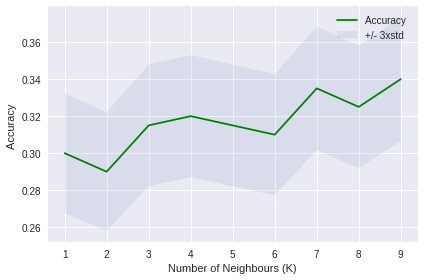

In [64]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

In [65]:
print( "Optimal accuracy is", mean_acc.max(), "having k =", mean_acc.argmax()+1) 

Optimal accuracy is 0.34 having k = 9


Gridsearch is another method.

In [71]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9]}

knn = KNeighborsClassifier()

model = GridSearchCV(knn, params, cv=3)
model.fit(x_train,y_train)
model.best_params_


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_neighbors': 7}

There is slightly different result, in this evaluation method. I will check later on this result.